In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Georreferencia y reproyeccion de datos vectoriales

**Geopandas**

Instalación

In [0]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 16.6MB/s 
     |████████████████████████████████| 10.1MB 51.8MB/s 


Apertura

In [0]:
import geopandas as gpd

In [0]:
df = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')

In [0]:
df.head() # coordenadas proyectadas

FNODE_  ...                                           geometry
0       0  ...  LINESTRING (2067557.423 2197112.287, 2071730.7...
1       0  ...  LINESTRING (2071730.751 2192639.254, 2074894.9...
2       0  ...  LINESTRING (2074894.943 2195062.388, 2078077.9...
3       0  ...  LINESTRING (2078077.985 2194784.597, 2082127.5...
4       0  ...  LINESTRING (2082127.527 2190850.698, 2093579.3...

[5 rows x 9 columns]

Graficación

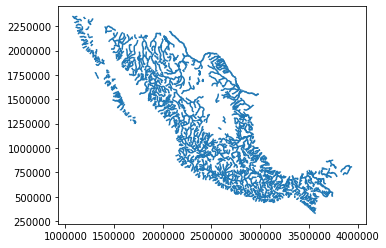

In [0]:
df.plot()

Reproyección

In [0]:
df.crs # checar la proyección "conica de lambert", tipo de coordenadas

{'datum': 'WGS84',
 'lat_0': 12,
 'lat_1': 17.5,
 'lat_2': 29.5,
 'lon_0': -102,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 2500000,
 'y_0': 0}

In [0]:
df.geometry

0       LINESTRING (2067557.423 2197112.287, 2071730.7...
1       LINESTRING (2071730.751 2192639.254, 2074894.9...
2       LINESTRING (2074894.943 2195062.388, 2078077.9...
3       LINESTRING (2078077.985 2194784.597, 2082127.5...
4       LINESTRING (2082127.527 2190850.698, 2093579.3...
                              ...                        
2229    LINESTRING (1608371.196 1347645.419, 1611178.8...
2230    LINESTRING (1622633.847 1328556.486, 1623296.4...
2231    LINESTRING (1691865.531 1286811.247, 1691842.5...
2232    LINESTRING (1691842.501 1286812.781, 1688298.1...
2233    LINESTRING (1717172.219 1245742.299, 1717030.0...
Name: geometry, Length: 2234, dtype: geometry

In [0]:
dfGeo = df.to_crs({'init':'epsg:4326'}) # Clave del diccionarío 'init'

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:
dfGeo.crs

{'init': 'epsg:4326'}

In [0]:
dfMer = df.to_crs({'init':'epsg:3857'}) # La que se usa para diferentes programas

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:
dfUTM = df.to_crs({'init':'epsg:32614'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Graficación

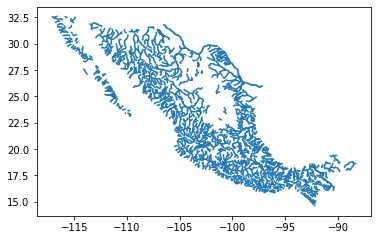

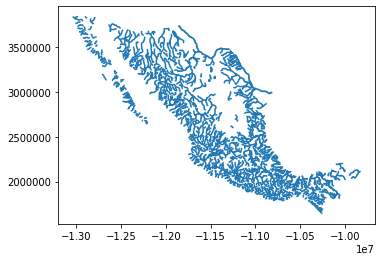

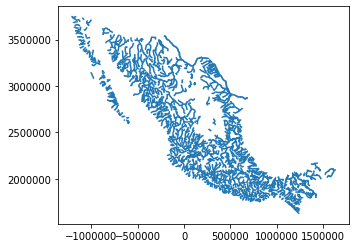

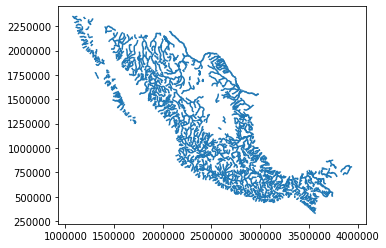

In [0]:
dfGeo.plot()
dfMer.plot()
dfUTM.plot()
df.plot()

In [0]:
df.crs

{'datum': 'WGS84',
 'lat_0': 12,
 'lat_1': 17.5,
 'lat_2': 29.5,
 'lon_0': -102,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 2500000,
 'y_0': 0}

Coordenadas

In [0]:
dfGeo.geometry

0       LINESTRING (-106.54331 31.78176, -106.49802 31...
1       LINESTRING (-106.49802 31.74282, -106.46560 31...
2       LINESTRING (-106.46560 31.76544, -106.43209 31...
3       LINESTRING (-106.43209 31.76383, -106.38832 31...
4       LINESTRING (-106.38832 31.72966, -106.26068 31...
                              ...                        
2229    LINESTRING (-110.81049 23.91674, -110.78537 23...
2230    LINESTRING (-110.65853 23.75165, -110.65354 23...
2231    LINESTRING (-109.95394 23.40968, -109.95417 23...
2232    LINESTRING (-109.95417 23.40968, -109.98911 23...
2233    LINESTRING (-109.68371 23.04989, -109.68638 23...
Name: geometry, Length: 2234, dtype: geometry

### PyProj

Interfaz de Python para PROJ (biblioteca de proyecciones cartográficas y transformaciones de coordenadas)

Importación

In [0]:
from pyproj import Proj,transform

In [0]:
import pyproj
print(dir(pyproj))

['CRS', 'DataDirError', 'Geod', 'Proj', 'ProjError', 'Transformer', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_crs', '_datadir', '_geod', '_list', '_proj', '_show_versions', '_transformer', 'cf1x8', 'compat', 'crs', 'datadir', 'enums', 'exceptions', 'geod', 'geodesic_version_str', 'get_angular_units_map', 'get_authorities', 'get_codes', 'get_ellps_map', 'get_prime_meridians_map', 'get_proj_operations_map', 'get_units_map', 'itransform', 'pj_ellps', 'pj_list', 'proj', 'proj_version_str', 'show_versions', 'transform', 'transformer', 'utils', 'warnings']


Definicion PROJ

+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs

In [0]:
#p1 = Proj('EPSG:4326') # proyeccion 1 ya predeterminada según el código
p1 = Proj('+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
#type(p1)
p2 = Proj('+proj=ortho +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +a=6370997 +f=0 +units=m +no_defs') # proyeccion 2
type(p2) # de coordenadas geograficas

pyproj.proj.Proj

Reproyeccion

In [0]:
transform(p2,p1,-99,19) 

(-155.94538672086887, 10001984.813383805)

In [0]:
df['geometry'][0].xy[0][0]

2067557.4225293566

In [0]:
print(df.shape)
x = []
y = []
for i in df['geometry']:
    for j, k in zip(i.xy[0], i.xy[1]):
        print(j, k)
        x.append(j)
        y.append(k)

(2234, 9)
2067557.4225293566 2197112.2866291013
2071730.750696953 2192639.2543916907
2071730.750696953 2192639.2543916907
2074894.9428974497 2195062.3878384233
2074894.9428974497 2195062.3878384233
2078077.9850692558 2194784.59684938
2078077.9850692558 2194784.59684938
2082127.5266955795 2190850.6978776976
2082127.5266955795 2190850.6978776976
2093579.3345573875 2166979.844042793
2093579.3345573875 2166979.844042793
2106207.820127057 2155062.5485259295
2106207.820127057 2155062.5485259295
2111808.9850946567 2152340.5539047066
2111808.9850946567 2152340.5539047066
2121352.794620534 2152407.102035757
2121352.794620534 2152407.102035757
2123532.5901104426 2149721.2219661176
2123532.5901104426 2149721.2219661176
2123561.48178482 2145579.3092885613
2123561.48178482 2145579.3092885613
2122786.94201096 2144793.871100761
2122786.94201096 2144793.871100761
2125970.823521737 2144395.0540624075
2125970.823521737 2144395.0540624075
2131589.7142656296 2139272.0859644003
2131589.7142656296 2139272.0

In [0]:
print(len(x))
len(y)

23161


23161

In [0]:
pc = Proj('EPSG:6372')

In [0]:
x_aze, y_aze = transform(p1, pc, x, y)
x_aze

[5891842.84971289,
 5891637.912577448,
 5891637.912577448,
 5895577.557460001,
 5895577.557460001,
 5897628.984305991,
 5897628.984305991,
 5897719.365124254,
 5897719.365124254,
 5889021.534250523,
 5889021.534250523,
 5889583.5486815795,
 5889583.5486815795,
 5891638.616706816,
 5891638.616706816,
 5898447.469879176,
 5898447.469879176,
 5898107.078395156,
 5898107.078395156,
 5895220.497362605,
 5895220.497362605,
 5894120.117041264,
 5894120.117041264,
 5896097.700462692,
 5896097.700462692,
 5896488.609192271,
 5896488.609192271,
 5894421.882654676,
 5894421.882654676,
 5895054.146856433,
 5895054.146856433,
 5895261.939877404,
 5895261.939877404,
 5897585.2637771815,
 5897585.2637771815,
 5898251.441112701,
 5898251.441112701,
 5893404.284988534,
 5893404.284988534,
 5894809.775945549,
 5894809.775945549,
 5892750.291645595,
 5892750.291645595,
 5894534.228604997,
 5894534.228604997,
 5896908.723859608,
 5896908.723859608,
 5898598.627442768,
 5898598.627442768,
 5903649.14601108

Reproyeccion multiple

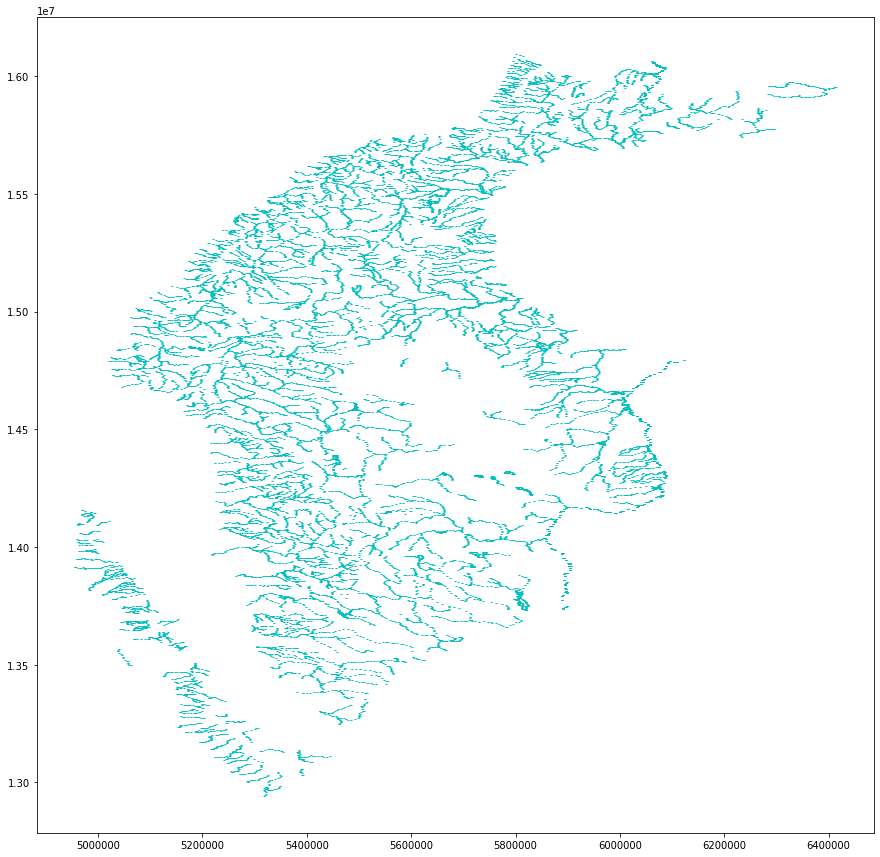

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot(x_aze,y_aze,'c_',markersize=2)

Extraccion de coordenadas

In [0]:
x = []
y = []
for i in dfGeo['geometry']:
  for j in i.xy[0]:
    print(j)
    x.append(j)
  for j in i.xy[1]:
    print(j)
    y.append(j)

-106.54330723000729
-106.49801712304445
31.781755555503214
31.742817675748334
-106.49801712304445
-106.46559802313791
31.742817675748334
31.765438297475736
-106.46559802313791
-106.43209235804015
31.765438297475736
31.76383265607833
-106.43209235804015
-106.38831648938815
31.76383265607833
31.729664913447625
-106.38831648938815
-106.26068140644391
31.729664913447625
31.518579740411646
-106.26068140644391
-106.12477368747051
31.518579740411646
31.41491715601288
-106.12477368747051
-106.06532801218712
31.41491715601288
31.391914453827297
-106.06532801218712
-105.96545136244654
31.391914453827297
31.394911737333626
-105.96545136244654
-105.94186168153395
31.394911737333626
31.371334731370627
-105.94186168153395
-105.9403680931571
31.371334731370627
31.334148299315054
-105.9403680931571
-105.94824521505106
31.334148299315054
31.32690347312232
-105.94824521505106
-105.91482260284289
31.32690347312232
31.324105916585996
-105.91482260284289
-105.85459956195638
31.324105916585996
31.2794632815

In [0]:
x_ortho,y_ortho = transform(p2,p1,x,y)
x_ortho

[-167.8278626297959,
 -167.75652064413177,
 -167.75652064413177,
 -167.70545420033883,
 -167.70545420033883,
 -167.6526757819805,
 -167.6526757819805,
 -167.583719117216,
 -167.583719117216,
 -167.382663804122,
 -167.382663804122,
 -167.16857916741677,
 -167.16857916741677,
 -167.07493948891425,
 -167.07493948891425,
 -166.91761305391012,
 -166.91761305391012,
 -166.88045401197286,
 -166.88045401197286,
 -166.87810068023748,
 -166.87810068023748,
 -166.89050866303597,
 -166.89050866303597,
 -166.83786105612572,
 -166.83786105612572,
 -166.74299650865746,
 -166.74299650865746,
 -166.68000288259182,
 -166.68000288259182,
 -166.5241946128134,
 -166.5241946128134,
 -166.4886250211236,
 -166.4886250211236,
 -166.3955201450965,
 -166.3955201450965,
 -166.32768955441676,
 -166.32768955441676,
 -166.2944642046706,
 -166.2944642046706,
 -166.0451077456677,
 -166.0451077456677,
 -165.99380615767922,
 -165.99380615767922,
 -165.90974448846003,
 -165.90974448846003,
 -165.88197449368997,
 -165.881

Graficación

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x_aze,y_aze,'bo',markersize=1)


## Geopy

Geopy es un cliente Python 2 y 3 para varios servicios web de geocodificación populares.

Geopy facilita a los desarrolladores de Python localizar las coordenadas de direcciones, ciudades, países y puntos de referencia en todo el mundo utilizando geocodificadores de terceros y otras fuentes de datos.

ArcGIS

AzureMaps

Baidu

Bing

DataBC

GeocodeEarth

GeocodeFarm

GoogleV3

HERE

IGNFrance

MapBox

Nominatim

### Documentación
https://geopy.readthedocs.io/en/stable/#semver


Importacion

In [0]:
from geopy.geocoders import Nominatim
import geopy

Busqueda coordenadas

In [0]:
geolocator = Nominatim(user_agent='unam') # Se crea una variable, el constructor es Nominatim (usuario)
print(type(geolocator))
geolocator.reverse("19, -99")
locacion = geolocator.reverse("19, -99")
print(locacion)

<class 'geopy.geocoders.osm.Nominatim'>
San Jose-Tlalnepantla, Tlalnepantla, Morelos, México


Parametros

In [0]:
print(locacion.address)
print(locacion.latitude, locacion.longitude)
print(locacion.raw)

San Jose-Tlalnepantla, Tlalnepantla, Morelos, México
19.000023594143496 -98.99985187676693
{'place_id': 216911780, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 655234102, 'lat': '19.000023594143496', 'lon': '-98.99985187676693', 'display_name': 'San Jose-Tlalnepantla, Tlalnepantla, Morelos, México', 'address': {'road': 'San Jose-Tlalnepantla', 'county': 'Tlalnepantla', 'state': 'Morelos', 'country': 'México', 'country_code': 'mx'}, 'boundingbox': ['18.9830555', '19.0047735', '-99.0028527', '-98.9987409']}


Busqueda por direccion

175 5th Avenue NYC

In [0]:
locacion = geolocator.geocode("Toluca")
print(locacion.address)
print((locacion.latitude, locacion.longitude))
print(locacion.raw)
print(type(locacion.raw))
print(locacion.point)

Toluca, Estado de México, 50150, México
(19.292545, -99.6569007)
{'place_id': 806353, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 269914302, 'boundingbox': ['19.132545', '19.452545', '-99.8169007', '-99.4969007'], 'lat': '19.292545', 'lon': '-99.6569007', 'display_name': 'Toluca, Estado de México, 50150, México', 'class': 'place', 'type': 'city', 'importance': 0.6307532529053955, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}
<class 'dict'>
19 17m 33.162s N, 99 39m 24.8425s W



**Distancias**

Euclidian

Great Cicle

Vicentys

Geodesic



In [0]:
from geopy.distance import great_circle,vincenty,geodesic
from shapely.geometry import Point
punto1  = (19.1,-99.1)
punto2 = (24,-102)
# 
print(Point(punto1[1],punto1[0]).distance(Point(punto2[1],punto2[0]))*111.15, "Km")
# Primero se calcula la distancia entre dos puntos con distance (este pide otro punto) y se pasa a Km
print(great_circle(punto1,punto2))
print(vincenty(punto1,punto2))
print(geodesic(punto1,punto2)) # Más exacta

632.8721319903416 Km
621.8839098418625 km
620.0938020932784 km
620.0938021071004 km


Ejercicio de Aplicacion.

Crear un programa en el cual se escriba la direccion de dos ciudades y calcule la distancia geodesica.

In [0]:
dir1 = input('Ciudad 1:')
dir2 = input('Ciudad 2:')
loc1 = geolocator.geocode(dir1)
loc2 = geolocator.geocode(dir2)
print("Localidad 1: ", loc1)
print("Localidad 2: ", loc2)
print(geodesic((loc1.latitude,loc1.longitude),(loc2.latitude,loc2.longitude)))

Ciudad 1:Neza
Ciudad 2:CDMX
Localidad 1:  Nezahualcóyotl, Estado de México, 57000, México
Localidad 2:  Ciudad de México, México
16.78507626125687 km


In [0]:
loc1

Location(Nezahualcóyotl, Estado de México, 57000, México, (19.4021151, -99.0170173, 0.0))

In [0]:
loc2

Location(Ciudad de México, México, (19.320556250000003, -99.15170107077653, 0.0))

# Geoprocesamiento

### Intersect

In [0]:
from shapely.geometry import Point

POINT (0 0)


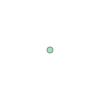

In [0]:
p1 = Point(0,0)
p2 = Point(3,3)
print(p1)
p2

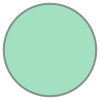

In [0]:
p1b = p1.buffer(3)
p2b = p2.buffer(3)
p1b

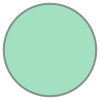

In [0]:
p2b

In [0]:
p1b.intersection(p2b)

### Union

In [0]:
p1b.union(p2b)

### Symetrical Difference

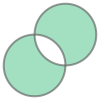

In [0]:
p1b.symmetric_difference(p2b)

### Diference

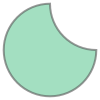

In [0]:
p1b.difference(p2b)

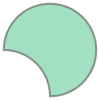

In [0]:
p2b.difference(p1b)

In [0]:
agua = gpd.read_file('/content/drive/My Drive/Curso-RV-python/EMCA_DBO_2018/EMCA_DBO5_2018.shp')
rios = gpd.read_file('/content/drive/My Drive/Curso-RV-python/hidro4mgw_c/hidro4mcw.shp')

In [0]:
agua.crs

{'ellps': 'GRS80',
 'lat_0': 12,
 'lat_1': 17.5,
 'lat_2': 29.5,
 'lon_0': -102,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 2500000,
 'y_0': 0}

In [0]:
rios.crs

{'datum': 'WGS84',
 'lat_0': 12,
 'lat_1': 17.5,
 'lat_2': 29.5,
 'lon_0': -102,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 2500000,
 'y_0': 0}

# Ejercicio de aplicacion

Con el shape de rios y de monitoreo del agua, obtener las partes del rio no monitoreadas

In [0]:
rios = rios.to_crs({'init':'epsg:4326'})
agua = agua.to_crs({'init':'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:
rios = rios.to_crs({'init':'epsg:6372'})
agua = agua.to_crs({'init':'epsg:6372'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:
calAgua = agua.to_crs({'init':'epsg:32614'}) 

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [0]:
calAguaBuf = agua.buffer(5000)
riosBuf = rios.buffer(2000)

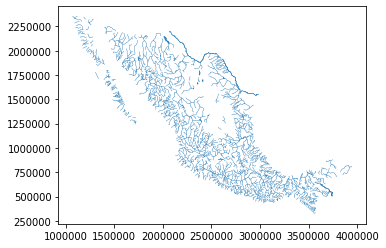

In [0]:
riosBuf.plot()

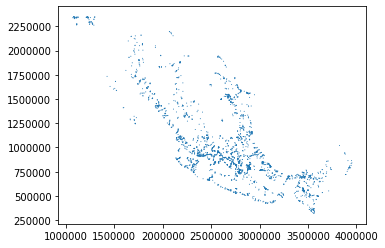

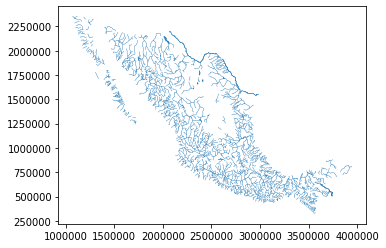

In [0]:
calAguaBuf.plot()
riosBuf.plot()

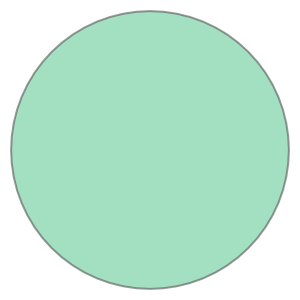

In [0]:
agua.buffer(5000)[0]

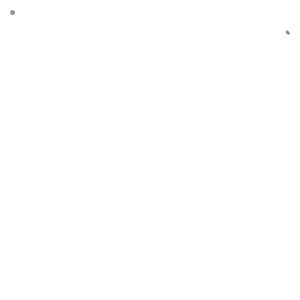

In [0]:
agua.buffer(5000)[0].symmetric_difference(rios.buffer(2000)[0])

In [0]:
agua.buffer(5000).symmetric_difference(rios.buffer(2000))

0       MULTIPOLYGON (((1117308.375 2264843.207, 11172...
1       MULTIPOLYGON (((1090961.829 2345947.556, 10909...
2       MULTIPOLYGON (((1118619.918 2275141.860, 11185...
3       MULTIPOLYGON (((1098787.570 2337704.203, 10987...
4       MULTIPOLYGON (((1116922.695 2268110.933, 11168...
                              ...                        
2824                                                 None
2825                                                 None
2826                                                 None
2827                                                 None
2828                                                 None
Length: 2829, dtype: geometry

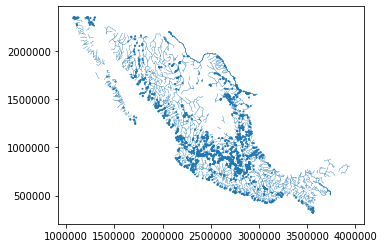

In [0]:
agua.buffer(10000).symmetric_difference(rios.buffer(2000)).plot()

<Figure size 720x720 with 0 Axes>

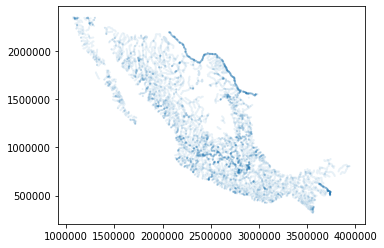

In [0]:
plt.figure(figsize=(10, 10))
agua.buffer(10000).symmetric_difference(rios.buffer(10000)).plot(alpha=0.1)

<Figure size 720x720 with 0 Axes>

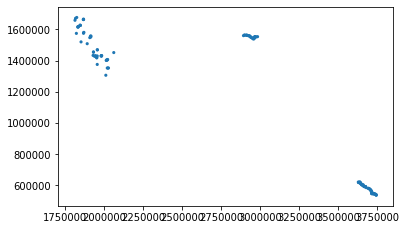

In [0]:
plt.figure(figsize=(10, 10))
agua.buffer(10000).symmetric_difference(rios.buffer(10000)[200: 250]).plot()

<Figure size 720x720 with 0 Axes>

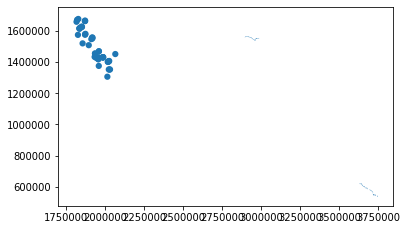

In [0]:
plt.figure(figsize=(10, 10))
agua.buffer(20000).union(rios.buffer(1000)[200: 250]).plot()

In [0]:
riosBuf = gpd.GeoDataFrame(riosBuf)
riosBuf = riosBuf.rename(columns={0:'geometry'}).set_geometry('geometry')
calAguaBuf = gpd.GeoDataFrame(calAguaBuf)
calAguaBuf = calAguaBuf.rename(columns={0:'geometry'}).set_geometry('geometry')

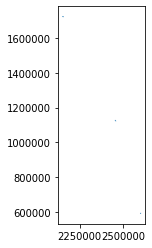

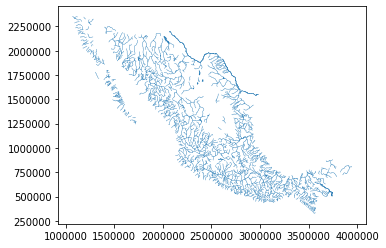

In [0]:
calAguaBuf.intersection(riosBuf).plot()
riosBuf.difference(calAguaBuf).plot()

# Cartopy


Cartopy es un paquete de Python diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales.

In [0]:
!apt install python3-cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-pkg-resources python3-pyshp python3-shapely python3-six
Suggested packages:
  python3-matplotlib python3-owslib python3-pil python3-pyepsg python3-scipy
  python3-setuptools python-shapely-doc
The following NEW packages will be installed:
  python3-cartopy python3-pkg-resources python3-pyshp python3-shapely
  python3-six
0 upgraded, 5 newly installed, 0 to remove and 7 not upgraded.
Need to get 5,570 kB of archives.
After this operation, 10.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-pyshp all 1.2.12+ds-1 [31.5 kB]
Get:3 http://a

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


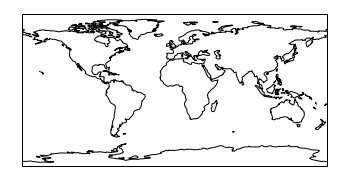

In [0]:
import cartopy.crs as ccrs
import cartopy

import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
